## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9854870	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9679342	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9487659	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9310874	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9137796	total: 62.6ms	remaining: 12.4s
5:	learn: 0.9001370	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8836619	total: 64.4ms	remaining: 9.14s
7:	learn: 0.8681949	total: 65.2ms	remaining: 8.09s
8:	learn: 0.8531951	total: 66ms	remaining: 7.27s
9:	learn: 0.8365558	total: 66.8ms	remaining: 6.62s
10:	learn: 0.8233602	total: 67.6ms	remaining: 6.08s
11:	learn: 0.8096640	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7950543	total: 69.3ms	remaining: 5.26s
13:	learn: 0.7800349	total: 70.1ms	remaining: 4.93s
14:	learn: 0.7682337	total: 70.9ms	remaining: 4.66s
15:	learn: 0.7549284	total: 71.7ms	remaining: 4.41s
16:	learn: 0.7414885	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7284181	total: 73.3ms	remaining: 4s
18:	learn: 0.7165064	total: 74.1ms	remaining: 3.83

57:	learn: 0.4372942	total: 106ms	remaining: 1.73s
58:	learn: 0.4330002	total: 107ms	remaining: 1.71s
59:	learn: 0.4284316	total: 108ms	remaining: 1.7s
60:	learn: 0.4246614	total: 109ms	remaining: 1.68s
61:	learn: 0.4206854	total: 110ms	remaining: 1.66s
62:	learn: 0.4176018	total: 111ms	remaining: 1.65s
63:	learn: 0.4131808	total: 112ms	remaining: 1.63s
64:	learn: 0.4100332	total: 113ms	remaining: 1.62s
65:	learn: 0.4065578	total: 114ms	remaining: 1.61s
66:	learn: 0.4034232	total: 114ms	remaining: 1.59s
67:	learn: 0.4001194	total: 115ms	remaining: 1.58s
68:	learn: 0.3967011	total: 116ms	remaining: 1.57s
69:	learn: 0.3944366	total: 117ms	remaining: 1.55s
70:	learn: 0.3911083	total: 118ms	remaining: 1.54s
71:	learn: 0.3886119	total: 118ms	remaining: 1.53s
72:	learn: 0.3864490	total: 119ms	remaining: 1.51s
73:	learn: 0.3832074	total: 120ms	remaining: 1.5s
74:	learn: 0.3806676	total: 121ms	remaining: 1.49s
75:	learn: 0.3772627	total: 122ms	remaining: 1.48s
76:	learn: 0.3741016	total: 123ms

155:	learn: 0.2595807	total: 191ms	remaining: 1.03s
156:	learn: 0.2584506	total: 192ms	remaining: 1.03s
157:	learn: 0.2575693	total: 193ms	remaining: 1.03s
158:	learn: 0.2568341	total: 194ms	remaining: 1.02s
159:	learn: 0.2561733	total: 194ms	remaining: 1.02s
160:	learn: 0.2555415	total: 195ms	remaining: 1.02s
161:	learn: 0.2547578	total: 196ms	remaining: 1.01s
162:	learn: 0.2542128	total: 197ms	remaining: 1.01s
163:	learn: 0.2536080	total: 197ms	remaining: 1s
164:	learn: 0.2527699	total: 198ms	remaining: 1s
165:	learn: 0.2520085	total: 199ms	remaining: 999ms
166:	learn: 0.2513375	total: 200ms	remaining: 997ms
167:	learn: 0.2502626	total: 201ms	remaining: 993ms
168:	learn: 0.2497123	total: 201ms	remaining: 990ms
169:	learn: 0.2492250	total: 202ms	remaining: 987ms
170:	learn: 0.2484862	total: 203ms	remaining: 985ms
171:	learn: 0.2479145	total: 204ms	remaining: 982ms
172:	learn: 0.2472407	total: 205ms	remaining: 979ms
173:	learn: 0.2464182	total: 206ms	remaining: 976ms
174:	learn: 0.2457

282:	learn: 0.1889302	total: 296ms	remaining: 751ms
283:	learn: 0.1884108	total: 297ms	remaining: 750ms
284:	learn: 0.1879617	total: 298ms	remaining: 748ms
285:	learn: 0.1878012	total: 299ms	remaining: 747ms
286:	learn: 0.1873008	total: 300ms	remaining: 745ms
287:	learn: 0.1867950	total: 301ms	remaining: 744ms
288:	learn: 0.1865121	total: 302ms	remaining: 742ms
289:	learn: 0.1861953	total: 302ms	remaining: 740ms
290:	learn: 0.1860235	total: 303ms	remaining: 739ms
291:	learn: 0.1855965	total: 304ms	remaining: 737ms
292:	learn: 0.1850891	total: 305ms	remaining: 735ms
293:	learn: 0.1845677	total: 306ms	remaining: 734ms
294:	learn: 0.1843899	total: 306ms	remaining: 732ms
295:	learn: 0.1839438	total: 307ms	remaining: 731ms
296:	learn: 0.1834204	total: 308ms	remaining: 729ms
297:	learn: 0.1832931	total: 309ms	remaining: 729ms
298:	learn: 0.1828442	total: 310ms	remaining: 727ms
299:	learn: 0.1824055	total: 311ms	remaining: 726ms
300:	learn: 0.1820249	total: 312ms	remaining: 724ms
301:	learn: 

385:	learn: 0.1536807	total: 383ms	remaining: 609ms
386:	learn: 0.1532681	total: 384ms	remaining: 607ms
387:	learn: 0.1529678	total: 384ms	remaining: 606ms
388:	learn: 0.1525553	total: 385ms	remaining: 605ms
389:	learn: 0.1523803	total: 386ms	remaining: 604ms
390:	learn: 0.1521424	total: 387ms	remaining: 602ms
391:	learn: 0.1518264	total: 388ms	remaining: 601ms
392:	learn: 0.1515357	total: 388ms	remaining: 600ms
393:	learn: 0.1511313	total: 389ms	remaining: 599ms
394:	learn: 0.1507159	total: 390ms	remaining: 597ms
395:	learn: 0.1504400	total: 391ms	remaining: 596ms
396:	learn: 0.1501020	total: 392ms	remaining: 595ms
397:	learn: 0.1496964	total: 393ms	remaining: 594ms
398:	learn: 0.1494740	total: 393ms	remaining: 593ms
399:	learn: 0.1492704	total: 394ms	remaining: 591ms
400:	learn: 0.1488135	total: 395ms	remaining: 590ms
401:	learn: 0.1484938	total: 396ms	remaining: 589ms
402:	learn: 0.1481231	total: 397ms	remaining: 588ms
403:	learn: 0.1479481	total: 397ms	remaining: 586ms
404:	learn: 

512:	learn: 0.1240204	total: 487ms	remaining: 462ms
513:	learn: 0.1237583	total: 488ms	remaining: 461ms
514:	learn: 0.1236324	total: 489ms	remaining: 460ms
515:	learn: 0.1233340	total: 490ms	remaining: 459ms
516:	learn: 0.1230312	total: 490ms	remaining: 458ms
517:	learn: 0.1227992	total: 491ms	remaining: 457ms
518:	learn: 0.1226150	total: 492ms	remaining: 456ms
519:	learn: 0.1223039	total: 493ms	remaining: 455ms
520:	learn: 0.1220211	total: 494ms	remaining: 454ms
521:	learn: 0.1218392	total: 494ms	remaining: 453ms
522:	learn: 0.1216479	total: 495ms	remaining: 452ms
523:	learn: 0.1214752	total: 496ms	remaining: 451ms
524:	learn: 0.1213031	total: 497ms	remaining: 450ms
525:	learn: 0.1211731	total: 498ms	remaining: 449ms
526:	learn: 0.1209586	total: 498ms	remaining: 447ms
527:	learn: 0.1208983	total: 499ms	remaining: 446ms
528:	learn: 0.1208710	total: 500ms	remaining: 445ms
529:	learn: 0.1207973	total: 501ms	remaining: 444ms
530:	learn: 0.1207772	total: 502ms	remaining: 443ms
531:	learn: 

614:	learn: 0.1055850	total: 573ms	remaining: 358ms
615:	learn: 0.1054666	total: 573ms	remaining: 357ms
616:	learn: 0.1052421	total: 574ms	remaining: 356ms
617:	learn: 0.1051609	total: 575ms	remaining: 356ms
618:	learn: 0.1048559	total: 576ms	remaining: 355ms
619:	learn: 0.1046866	total: 577ms	remaining: 354ms
620:	learn: 0.1045387	total: 578ms	remaining: 353ms
621:	learn: 0.1042600	total: 579ms	remaining: 352ms
622:	learn: 0.1041675	total: 579ms	remaining: 351ms
623:	learn: 0.1039479	total: 580ms	remaining: 350ms
624:	learn: 0.1038488	total: 581ms	remaining: 349ms
625:	learn: 0.1038241	total: 582ms	remaining: 348ms
626:	learn: 0.1036042	total: 583ms	remaining: 347ms
627:	learn: 0.1035783	total: 584ms	remaining: 346ms
628:	learn: 0.1034206	total: 584ms	remaining: 345ms
629:	learn: 0.1032939	total: 585ms	remaining: 344ms
630:	learn: 0.1032161	total: 586ms	remaining: 343ms
631:	learn: 0.1031916	total: 587ms	remaining: 342ms
632:	learn: 0.1029934	total: 587ms	remaining: 340ms
633:	learn: 

740:	learn: 0.0871604	total: 677ms	remaining: 237ms
741:	learn: 0.0871444	total: 678ms	remaining: 236ms
742:	learn: 0.0870624	total: 678ms	remaining: 235ms
743:	learn: 0.0870078	total: 679ms	remaining: 234ms
744:	learn: 0.0869814	total: 680ms	remaining: 233ms
745:	learn: 0.0868684	total: 681ms	remaining: 232ms
746:	learn: 0.0867402	total: 682ms	remaining: 231ms
747:	learn: 0.0867205	total: 682ms	remaining: 230ms
748:	learn: 0.0866998	total: 683ms	remaining: 229ms
749:	learn: 0.0865523	total: 684ms	remaining: 228ms
750:	learn: 0.0864311	total: 685ms	remaining: 227ms
751:	learn: 0.0863813	total: 685ms	remaining: 226ms
752:	learn: 0.0863067	total: 686ms	remaining: 225ms
753:	learn: 0.0862908	total: 687ms	remaining: 224ms
754:	learn: 0.0861759	total: 688ms	remaining: 223ms
755:	learn: 0.0859977	total: 689ms	remaining: 222ms
756:	learn: 0.0858713	total: 690ms	remaining: 221ms
757:	learn: 0.0857108	total: 690ms	remaining: 220ms
758:	learn: 0.0855745	total: 691ms	remaining: 220ms
759:	learn: 

845:	learn: 0.0753898	total: 763ms	remaining: 139ms
846:	learn: 0.0753799	total: 764ms	remaining: 138ms
847:	learn: 0.0752901	total: 765ms	remaining: 137ms
848:	learn: 0.0751885	total: 766ms	remaining: 136ms
849:	learn: 0.0751189	total: 767ms	remaining: 135ms
850:	learn: 0.0748984	total: 768ms	remaining: 134ms
851:	learn: 0.0748054	total: 769ms	remaining: 134ms
852:	learn: 0.0747154	total: 770ms	remaining: 133ms
853:	learn: 0.0746118	total: 770ms	remaining: 132ms
854:	learn: 0.0745502	total: 771ms	remaining: 131ms
855:	learn: 0.0745037	total: 772ms	remaining: 130ms
856:	learn: 0.0743528	total: 773ms	remaining: 129ms
857:	learn: 0.0742705	total: 774ms	remaining: 128ms
858:	learn: 0.0740726	total: 774ms	remaining: 127ms
859:	learn: 0.0739342	total: 775ms	remaining: 126ms
860:	learn: 0.0738252	total: 776ms	remaining: 125ms
861:	learn: 0.0737075	total: 777ms	remaining: 124ms
862:	learn: 0.0735737	total: 778ms	remaining: 123ms
863:	learn: 0.0734873	total: 778ms	remaining: 123ms
864:	learn: 

973:	learn: 0.0633102	total: 867ms	remaining: 23.1ms
974:	learn: 0.0631991	total: 868ms	remaining: 22.3ms
975:	learn: 0.0631891	total: 869ms	remaining: 21.4ms
976:	learn: 0.0630552	total: 870ms	remaining: 20.5ms
977:	learn: 0.0629415	total: 870ms	remaining: 19.6ms
978:	learn: 0.0628940	total: 871ms	remaining: 18.7ms
979:	learn: 0.0627596	total: 872ms	remaining: 17.8ms
980:	learn: 0.0627500	total: 873ms	remaining: 16.9ms
981:	learn: 0.0626297	total: 874ms	remaining: 16ms
982:	learn: 0.0625497	total: 875ms	remaining: 15.1ms
983:	learn: 0.0624975	total: 875ms	remaining: 14.2ms
984:	learn: 0.0623701	total: 876ms	remaining: 13.3ms
985:	learn: 0.0623067	total: 877ms	remaining: 12.5ms
986:	learn: 0.0622156	total: 879ms	remaining: 11.6ms
987:	learn: 0.0621346	total: 880ms	remaining: 10.7ms
988:	learn: 0.0620808	total: 880ms	remaining: 9.79ms
989:	learn: 0.0619625	total: 881ms	remaining: 8.9ms
990:	learn: 0.0619500	total: 882ms	remaining: 8.01ms
991:	learn: 0.0619234	total: 883ms	remaining: 7.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

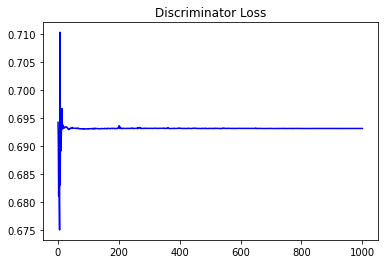

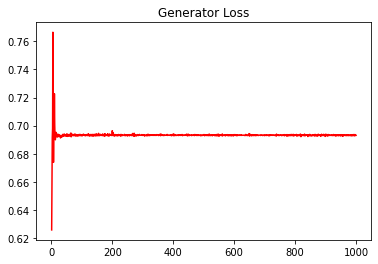

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10403803912067558


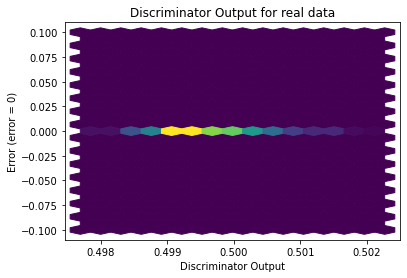

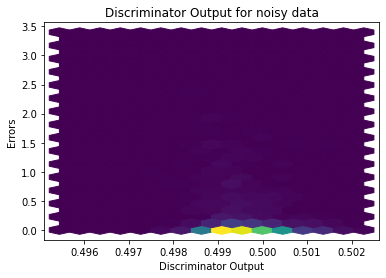

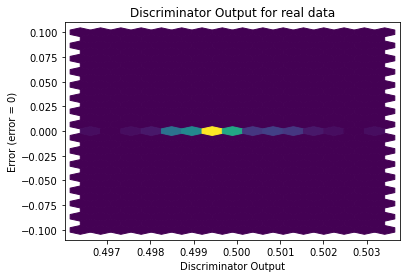

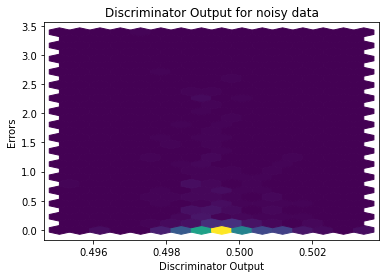

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


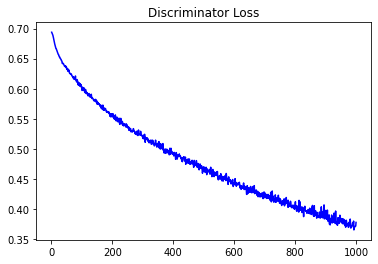

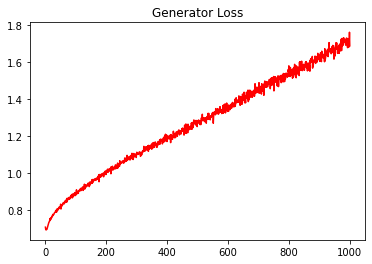

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09444501864050868


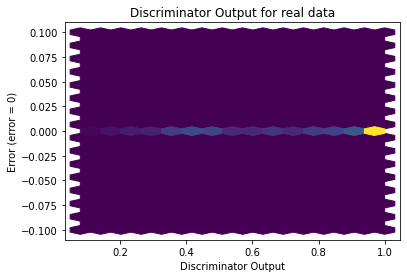

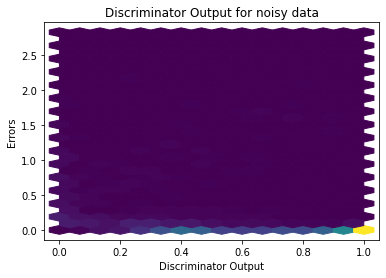

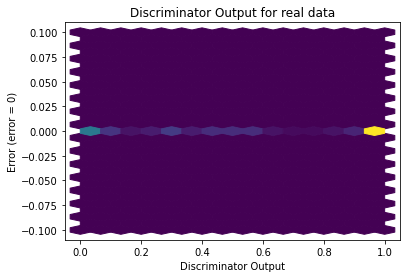

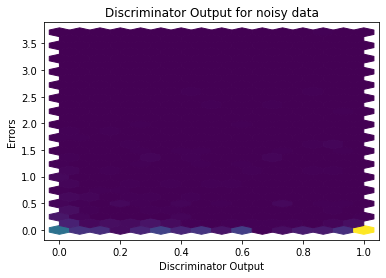

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
